In [ ]:
import pandas as pd
import numpy as np
import csv
from google.colab import drive
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

In [ ]:
pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.0 MB/s eta 0:00:00


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
gdelt = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/GDELT/dataset3_cleaned.csv')

In [ ]:
gdelt

,GlobalEventID,EventCode,GoldsteinScale,AvgTone,ActionGeo_CountryCode,SOURCEURL
0,1058430851,144,-7.5,-7.809703,US,https://www.chron.com/news/article/Water-main-...
1,1058486233,144,-7.5,-4.577465,PK,https://www.sott.net/article/470956-Floods-wre...
2,1058456511,144,-7.5,-4.340836,PK,https://tribune.com.pk/story/2370941/floods-wr...
3,1058424345,202,-10.0,-7.965368,US,https://www.nytimes.com/2022/08/12/world/europ...
4,1057549542,202,-10.0,-8.988764,US,https://www.newsbytesapp.com/news/world/4-dead...
...,...,...,...,...,...,...
87389,1130114164,195,-10.0,-8.644401,US,https://thegrio.com/2023/09/29/jury-convicts-m...
87390,1130013846,195,-10.0,-9.558824,PK,https://www.dawn.com/news/1778511/explosion-in...
87391,1130032228,195,-10.0,-7.625218,PK,https://www.dawn.com/news/1778511/at-least-52-...
87392,1130061487,195,-10.0,-10.330579,PK,https://www.presstv.ir/Detail/2023/09/29/71172...


In [ ]:
imf1 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/cleaned_datasetIMF_US.csv')
imf2 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/cleaned_datasetIMF_PK.csv')

In [ ]:
gdelt1 = gdelt[gdelt["ActionGeo_CountryCode"] == "US"]["AvgTone"]
gdelt2 = gdelt[gdelt["ActionGeo_CountryCode"] == "PK"]["AvgTone"]

In [ ]:
gdelt2.head(10)

,AvgTone
1,-4.577465
2,-4.340836
17,-2.054232
24,-3.508772
27,-0.717489
38,-8.080808
41,-5.882353
79,-6.626506
80,-7.841387
81,-7.842452


In [ ]:
imfUS = imf1.drop(columns=['Country code'])
imfPK = imf2.drop(columns=['Country code'])

In [ ]:
gdelt1 = gdelt1.dropna()
imfUS = imfUS.dropna()
gdelt2 = gdelt2.dropna()
imfPK = imfPK.dropna()

In [ ]:
gdelt1.reset_index(drop=True, inplace=True)
gdelt2.reset_index(drop=True, inplace=True)


In [ ]:
df_transposed = imfUS.T
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed[1:].reset_index(drop=True)

In [ ]:
df_transposed1 = imfPK.T
df_transposed1.columns = df_transposed1.iloc[0]
df_transposed1 = df_transposed1[1:].reset_index(drop=True)

In [ ]:
important_columns = [
    'Current account', 'Goods and services', 'Total credit', 'Total debit',
    'Net international investment position', 'Direct investment', 'Portfolio investment',
    'Reserve assets', 'Net errors and omissions',
    'Investment income, credit', 'Investment income, debit', 'Financial account',
    'Capital account', 'Secondary income'
]


df_transposed = df_transposed[important_columns]
df_transposed = df_transposed.loc[:, ~df_transposed.columns.duplicated()]

important_columns1 = [
    'Current account', 'Goods and services', 'Total credit', 'Total debit',
    'Net international investment position', 'Direct investment', 'Portfolio investment',
    'Reserve assets', 'Net errors and omissions',
    'Investment income, credit', 'Investment income, debit', 'Financial account',
    'Capital account', 'Secondary income'
]
df_transposed1 = df_transposed1[important_columns1]
df_transposed1 = df_transposed1.loc[:, ~df_transposed1.columns.duplicated()]


df_transposed1.head(10)

Indicator,Current account,Goods and services,Total credit,Total debit,Net international investment position,Direct investment,Portfolio investment,Reserve assets,Net errors and omissions,"Investment income, credit","Investment income, debit",Financial account,Capital account,Secondary income
0,"-12.216,11","-37.627,11","678,00","6.092,00","-128.075,19","-305,00","714,00","-11.961,31","194,01","359,00","6.064,00","-11.616,09","406,00","30.825,00"
1,"-3.902,08","-10.238,08","145,00","1.436,00","-128.662,82","-91,00","-555,00","-5.715,02","25,03","76,00","1.430,00","-3.827,05","50,00","7.627,00"
2,"-4.466,85","-11.583,85","187,00","1.638,00","-131.126,71","-496,00","236,00","-1.481,60","366,29","78,00","1.630,00","-4.061,57","39,00","8.568,00"
3,"-2.441,03","-9.431,03","245,00","1.266,00","-130.504,39","-353,00","30,00","-2.214,91","-0,73","174,00","1.259,00","-2.407,76","34,00","8.011,00"
4,"-1.406,15","-6.374,15","101,00","1.752,00","-128.075,19","635,00","1.003,00","-2.549,77","-196,57","31,00","1.745,00","-1.319,72","283,00","6.619,00"


In [ ]:
df_transposed1.head(10)

Indicator,Current account,Goods and services,Total credit,Total debit,Net international investment position,Direct investment,Portfolio investment,Reserve assets,Net errors and omissions,"Investment income, credit","Investment income, debit",Financial account,Capital account,Secondary income
0,"-12.216,11","-37.627,11","678,00","6.092,00","-128.075,19","-305,00","714,00","-11.961,31","194,01","359,00","6.064,00","-11.616,09","406,00","30.825,00"
1,"-3.902,08","-10.238,08","145,00","1.436,00","-128.662,82","-91,00","-555,00","-5.715,02","25,03","76,00","1.430,00","-3.827,05","50,00","7.627,00"
2,"-4.466,85","-11.583,85","187,00","1.638,00","-131.126,71","-496,00","236,00","-1.481,60","366,29","78,00","1.630,00","-4.061,57","39,00","8.568,00"
3,"-2.441,03","-9.431,03","245,00","1.266,00","-130.504,39","-353,00","30,00","-2.214,91","-0,73","174,00","1.259,00","-2.407,76","34,00","8.011,00"
4,"-1.406,15","-6.374,15","101,00","1.752,00","-128.075,19","635,00","1.003,00","-2.549,77","-196,57","31,00","1.745,00","-1.319,72","283,00","6.619,00"


In [ ]:
df_merged1 = pd.merge(gdelt1, df_transposed, left_index=True, right_index=True, how='inner')

In [ ]:
df_merged2 = pd.merge(gdelt2, df_transposed1, left_index=True, right_index=True, how='inner')

In [ ]:
df_merged2.head()

,AvgTone,Current account,Goods and services,Total credit,Total debit,Net international investment position,Direct investment,Portfolio investment,Reserve assets,Net errors and omissions,"Investment income, credit","Investment income, debit",Financial account,Capital account,Secondary income
0,-4.577465,"-12.216,11","-37.627,11","678,00","6.092,00","-128.075,19","-305,00","714,00","-11.961,31","194,01","359,00","6.064,00","-11.616,09","406,00","30.825,00"
1,-4.340836,"-3.902,08","-10.238,08","145,00","1.436,00","-128.662,82","-91,00","-555,00","-5.715,02","25,03","76,00","1.430,00","-3.827,05","50,00","7.627,00"
2,-2.054232,"-4.466,85","-11.583,85","187,00","1.638,00","-131.126,71","-496,00","236,00","-1.481,60","366,29","78,00","1.630,00","-4.061,57","39,00","8.568,00"
3,-3.508772,"-2.441,03","-9.431,03","245,00","1.266,00","-130.504,39","-353,00","30,00","-2.214,91","-0,73","174,00","1.259,00","-2.407,76","34,00","8.011,00"
4,-0.717489,"-1.406,15","-6.374,15","101,00","1.752,00","-128.075,19","635,00","1.003,00","-2.549,77","-196,57","31,00","1.745,00","-1.319,72","283,00","6.619,00"


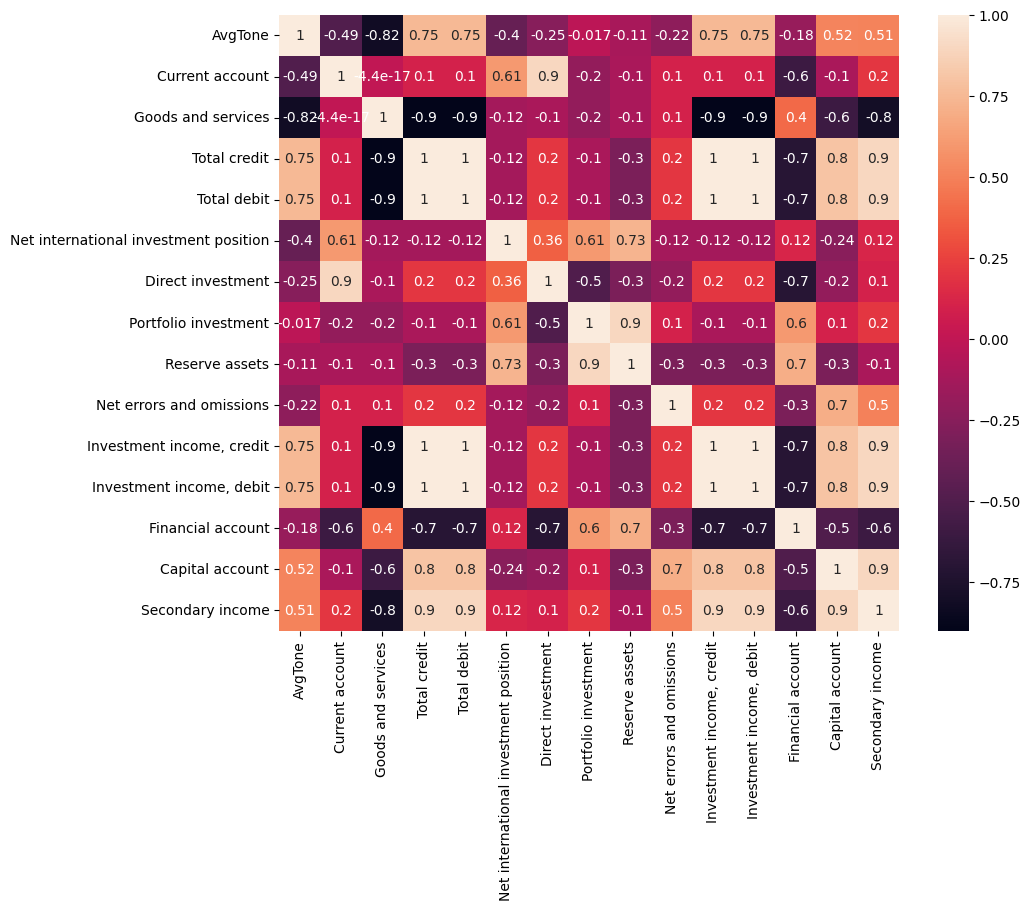

<Figure size 640x480 with 0 Axes>

In [ ]:
le = LabelEncoder()

for column in df_merged1.columns:
    if df_merged1[column].dtype == 'object':
        df_merged1[column] = le.fit_transform(df_merged1[column].astype(str))

plt.figure(figsize=(10, 8))
sns.heatmap(df_merged1.corr(), annot=True)
plt.show()

plt.tight_layout()
plt.show()

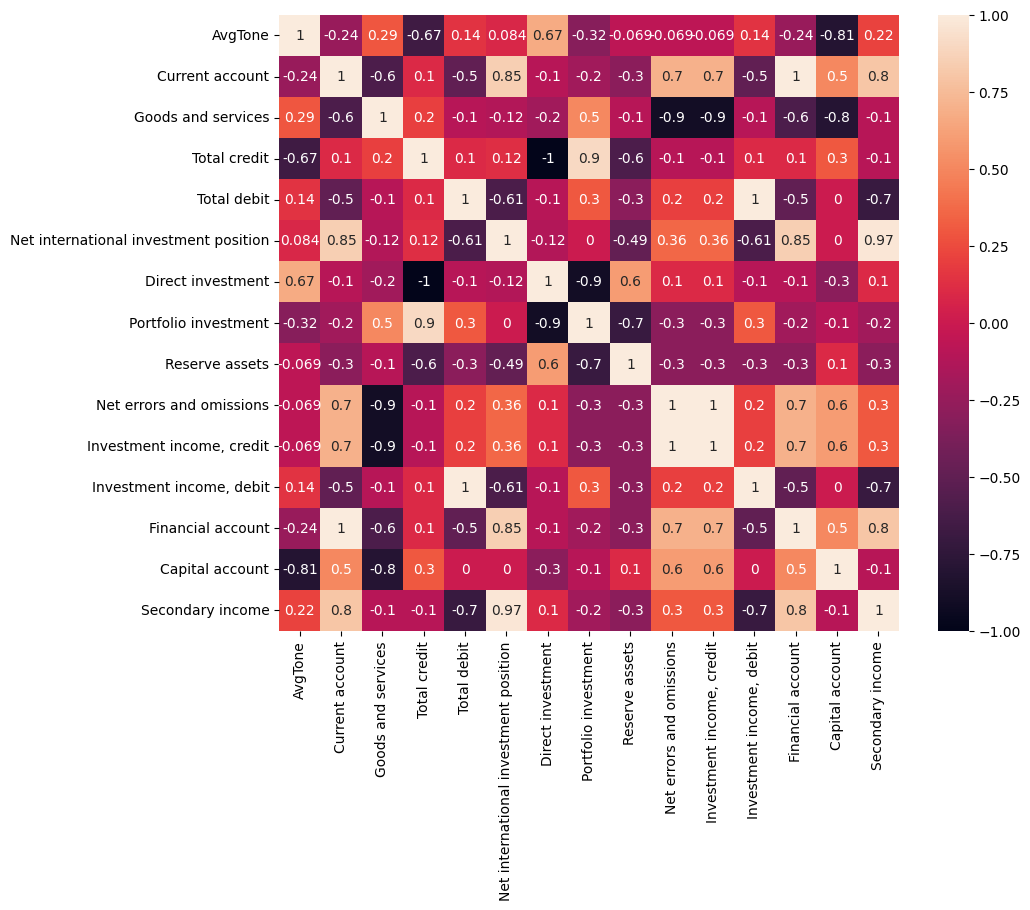

<Figure size 640x480 with 0 Axes>

In [ ]:
le = LabelEncoder()

for column in df_merged2.columns:
    if df_merged2[column].dtype == 'object':
        df_merged2[column] = le.fit_transform(df_merged2[column].astype(str))

plt.figure(figsize=(10, 8))
sns.heatmap(df_merged2.corr(), annot=True)
plt.show()

plt.tight_layout()
plt.show()

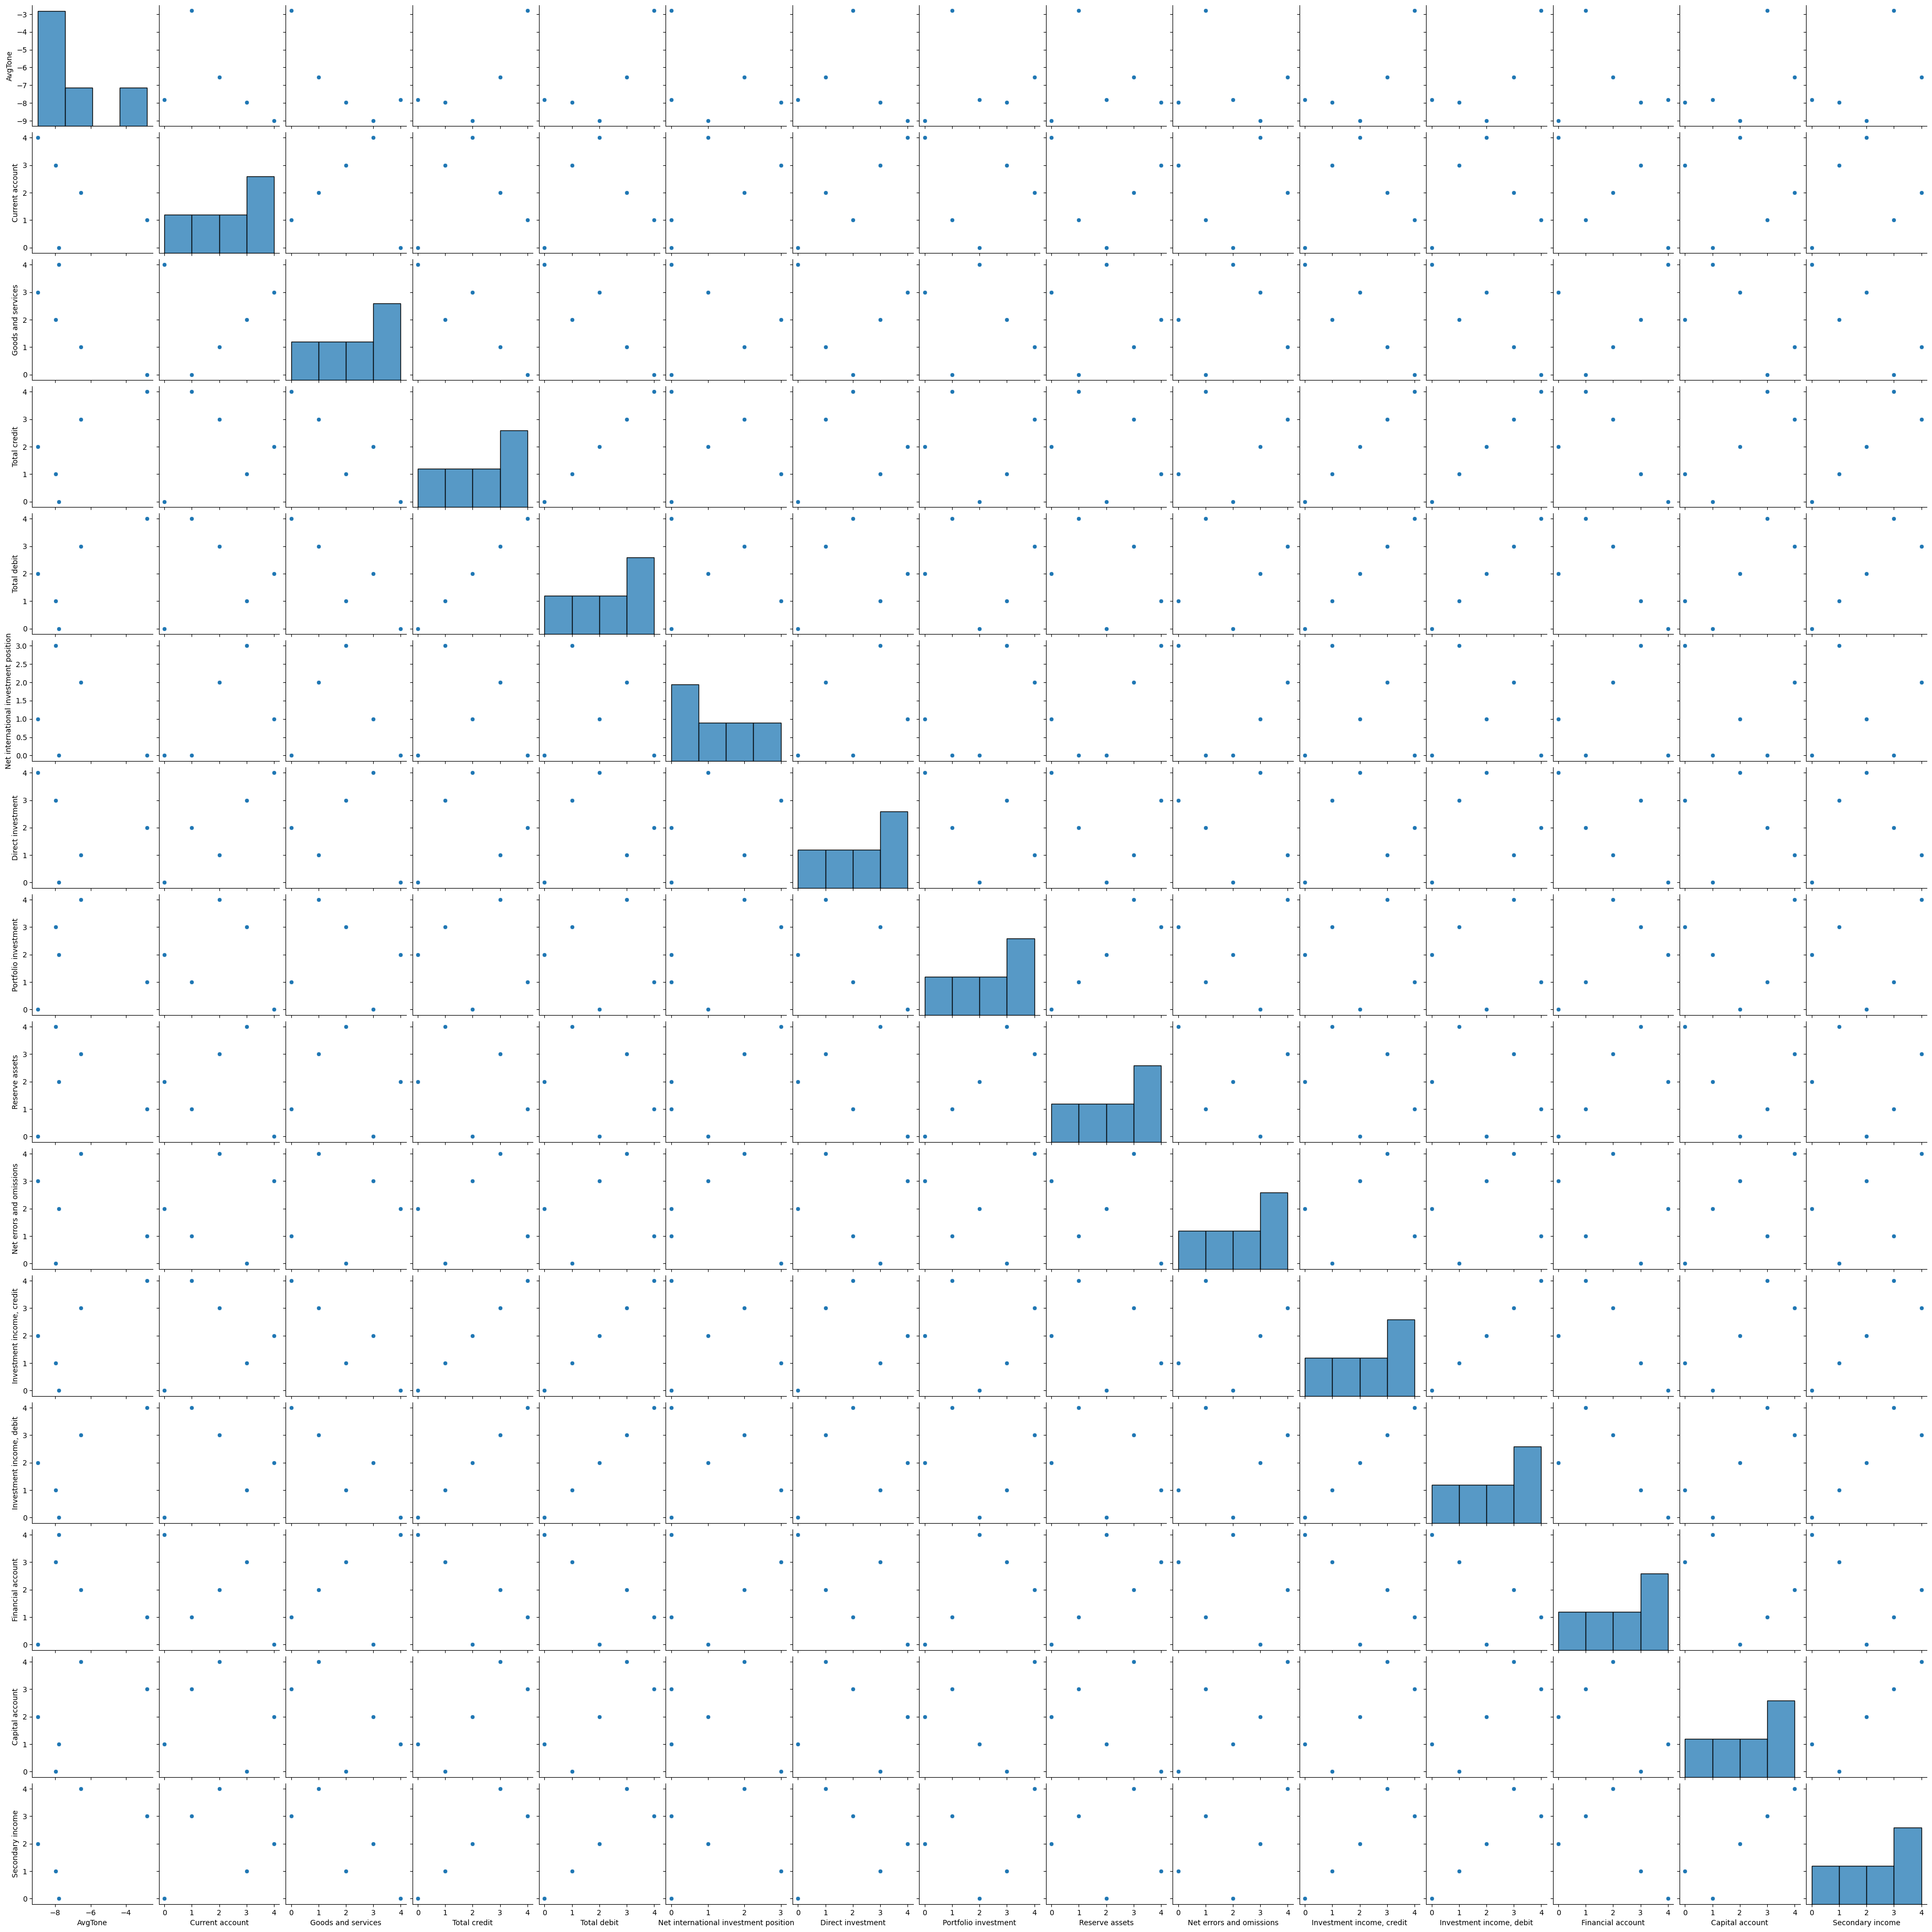

In [ ]:
sns.pairplot(df_merged1)
plt.show()

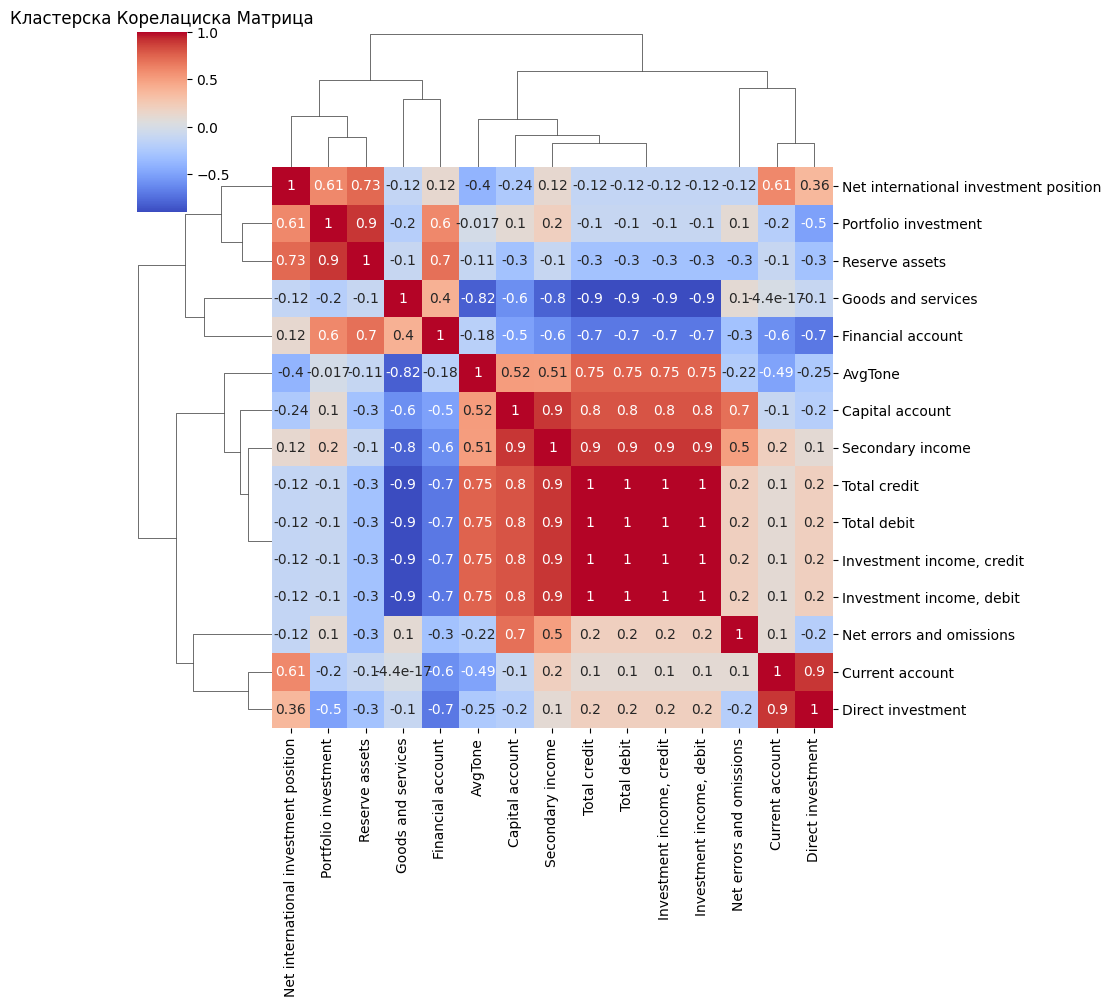

In [ ]:
sns.clustermap(df_merged1.corr(), annot=True, cmap='coolwarm')
plt.title('Кластерска Корелациска Матрица')
plt.show()

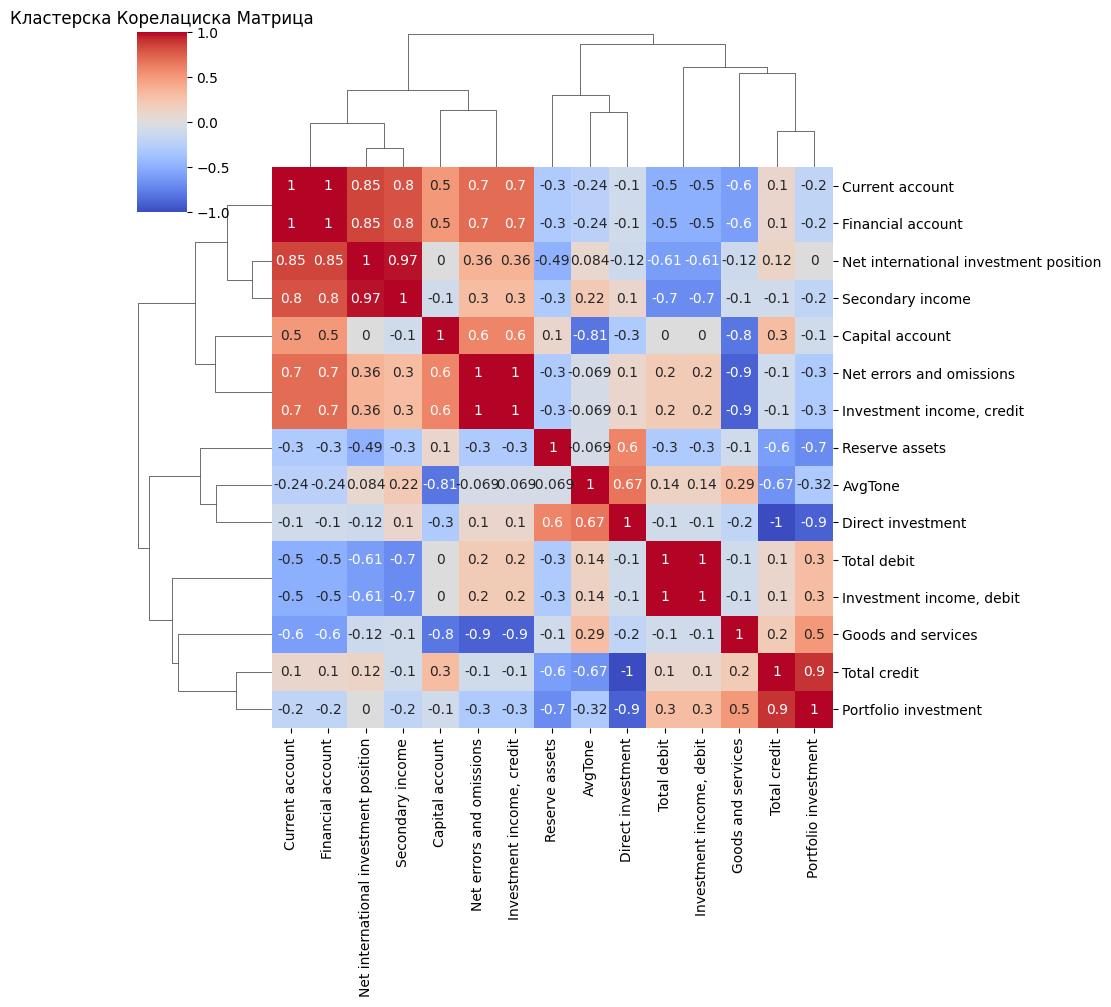

In [ ]:
sns.clustermap(df_merged2.corr(), annot=True, cmap='coolwarm')
plt.title('Кластерска Корелациска Матрица')
plt.show()

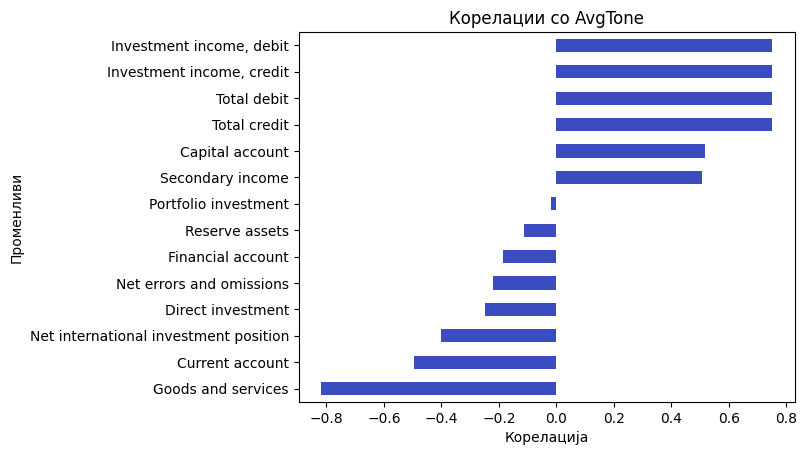

In [ ]:
corrs = df_merged1.corr()['AvgTone'].drop('AvgTone')
corrs.sort_values().plot(kind='barh', colormap='coolwarm')
plt.xlabel('Корелација')
plt.ylabel('Променливи')
plt.title('Корелации со AvgTone')
plt.show()


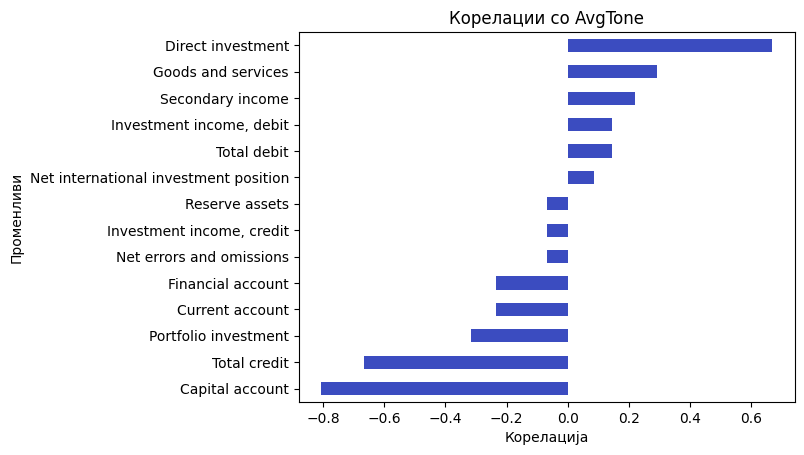

In [ ]:
corrs = df_merged2.corr()['AvgTone'].drop('AvgTone')
corrs.sort_values().plot(kind='barh', colormap='coolwarm')
plt.xlabel('Корелација')
plt.ylabel('Променливи')
plt.title('Корелации со AvgTone')
plt.show()

In [ ]:
spearman_corr = df_merged1.corr(method='spearman')
print("Spearman Correlation:\n", spearman_corr)

kendall_corr = df_merged1.corr(method='kendall')
print("\nKendall Correlation:\n", kendall_corr)

Spearman Correlation:
                                         AvgTone  Current account  \
AvgTone                                1.000000        -0.700000   
Current account                       -0.700000         1.000000   
Goods and services                    -0.700000         0.000000   
Total credit                           0.600000         0.100000   
Total debit                            0.600000         0.100000   
Net international investment position -0.410391         0.666886   
Direct investment                     -0.600000         0.900000   
Portfolio investment                   0.300000        -0.200000   
Reserve assets                         0.100000        -0.100000   
Net errors and omissions               0.000000         0.100000   
Investment income, credit              0.600000         0.100000   
Investment income, debit               0.600000         0.100000   
Financial account                      0.100000        -0.600000   
Capital account          

In [ ]:
spearman_corr = df_merged2.corr(method='spearman')
print("Spearman Correlation:\n", spearman_corr)

kendall_corr = df_merged2.corr(method='kendall')
print("\nKendall Correlation:\n", kendall_corr)

Spearman Correlation:
                                         AvgTone  Current account  \
AvgTone                                1.000000        -0.100000   
Current account                       -0.100000         1.000000   
Goods and services                     0.300000        -0.600000   
Total credit                          -0.700000         0.100000   
Total debit                           -0.100000        -0.500000   
Net international investment position  0.205196         0.872082   
Direct investment                      0.700000        -0.100000   
Portfolio investment                  -0.400000        -0.200000   
Reserve assets                         0.000000        -0.300000   
Net errors and omissions              -0.100000         0.700000   
Investment income, credit             -0.100000         0.700000   
Investment income, debit              -0.100000        -0.500000   
Financial account                     -0.100000         1.000000   
Capital account          

In [ ]:
from dcor import distance_correlation

numeric_columns = df_merged1.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop('AvgTone', errors='ignore')

results = {}
for col in numeric_columns:
    corr_value = distance_correlation(df_merged1['AvgTone'], df_merged1[col])
    results[col] = corr_value

sorted_results = sorted(results.items(), key=lambda x: abs(x[1]), reverse=True)
for col, value in sorted_results:
    print(f"Distance Correlation between AvgTone and {col}: {value:.4f}")

Distance Correlation between AvgTone and Goods and services: 0.8721
Distance Correlation between AvgTone and Total credit: 0.8616
Distance Correlation between AvgTone and Total debit: 0.8616
Distance Correlation between AvgTone and Investment income, credit: 0.8616
Distance Correlation between AvgTone and Investment income, debit: 0.8616
Distance Correlation between AvgTone and Capital account: 0.7389
Distance Correlation between AvgTone and Secondary income: 0.7370
Distance Correlation between AvgTone and Current account: 0.6763
Distance Correlation between AvgTone and Financial account: 0.6555
Distance Correlation between AvgTone and Direct investment: 0.6253
Distance Correlation between AvgTone and Portfolio investment: 0.6201
Distance Correlation between AvgTone and Reserve assets: 0.6039
Distance Correlation between AvgTone and Net errors and omissions: 0.5743
Distance Correlation between AvgTone and Net international investment position: 0.5448


/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


In [ ]:
numeric_columns = df_merged2.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop('AvgTone', errors='ignore')


results = {}
for col in numeric_columns:
    corr_value = distance_correlation(df_merged2['AvgTone'], df_merged2[col])
    results[col] = corr_value


sorted_results = sorted(results.items(), key=lambda x: abs(x[1]), reverse=True)
for col, value in sorted_results:
    print(f"Distance Correlation between AvgTone and {col}: {value:.4f}")

Distance Correlation between AvgTone and Capital account: 0.8314
Distance Correlation between AvgTone and Total credit: 0.7108
Distance Correlation between AvgTone and Direct investment: 0.7108
Distance Correlation between AvgTone and Current account: 0.6296
Distance Correlation between AvgTone and Financial account: 0.6296
Distance Correlation between AvgTone and Portfolio investment: 0.6260
Distance Correlation between AvgTone and Total debit: 0.6096
Distance Correlation between AvgTone and Investment income, debit: 0.6096
Distance Correlation between AvgTone and Secondary income: 0.6012
Distance Correlation between AvgTone and Net errors and omissions: 0.5639
Distance Correlation between AvgTone and Investment income, credit: 0.5639
Distance Correlation between AvgTone and Net international investment position: 0.5564
Distance Correlation between AvgTone and Goods and services: 0.5503
Distance Correlation between AvgTone and Reserve assets: 0.5321


/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


In [ ]:
from sklearn.feature_selection import mutual_info_regression

X = df_merged1['AvgTone'].values.reshape(-1, 1)

mi_dict = {}

for column in df_merged1.columns:
    if column != 'AvgTone':
        y = df_merged1[column]
        mi = mutual_info_regression(X, y)
        mi_dict[column] = mi[0]

sorted_mi = sorted(mi_dict.items(), key=lambda x: x[1], reverse=True)
for feature, mi_value in sorted_mi:
    print(f"Mutual Information between AvgTone and {feature}: {mi_value}")

Mutual Information between AvgTone and Goods and services: 0.11666666666666692
Mutual Information between AvgTone and Total debit: 0.11666666666666692
Mutual Information between AvgTone and Investment income, debit: 0.11666666666666692
Mutual Information between AvgTone and Total credit: 0.050000000000000266
Mutual Information between AvgTone and Investment income, credit: 0.050000000000000266
Mutual Information between AvgTone and Net international investment position: 2.220446049250313e-16
Mutual Information between AvgTone and Current account: 0
Mutual Information between AvgTone and Direct investment: 0
Mutual Information between AvgTone and Portfolio investment: 0
Mutual Information between AvgTone and Reserve assets: 0
Mutual Information between AvgTone and Net errors and omissions: 0
Mutual Information between AvgTone and Financial account: 0
Mutual Information between AvgTone and Capital account: 0
Mutual Information between AvgTone and Secondary income: 0


In [ ]:
X = df_merged2['AvgTone'].values.reshape(-1, 1)

mi_dict = {}

for column in df_merged2.columns:
    if column != 'AvgTone':
        y = df_merged2[column]
        mi = mutual_info_regression(X, y)
        mi_dict[column] = mi[0]

sorted_mi = sorted(mi_dict.items(), key=lambda x: x[1], reverse=True)
for feature, mi_value in sorted_mi:
    print(f"Mutual Information between AvgTone and {feature}: {mi_value}")

Mutual Information between AvgTone and Total credit: 0.13333333333333353
Mutual Information between AvgTone and Direct investment: 0.13333333333333353
Mutual Information between AvgTone and Current account: 0.06666666666666687
Mutual Information between AvgTone and Financial account: 0.06666666666666687
Mutual Information between AvgTone and Capital account: 0.06666666666666687
Mutual Information between AvgTone and Net international investment position: 2.220446049250313e-16
Mutual Information between AvgTone and Goods and services: 0
Mutual Information between AvgTone and Total debit: 0
Mutual Information between AvgTone and Portfolio investment: 0
Mutual Information between AvgTone and Reserve assets: 0
Mutual Information between AvgTone and Net errors and omissions: 0
Mutual Information between AvgTone and Investment income, credit: 0
Mutual Information between AvgTone and Investment income, debit: 0
Mutual Information between AvgTone and Secondary income: 0


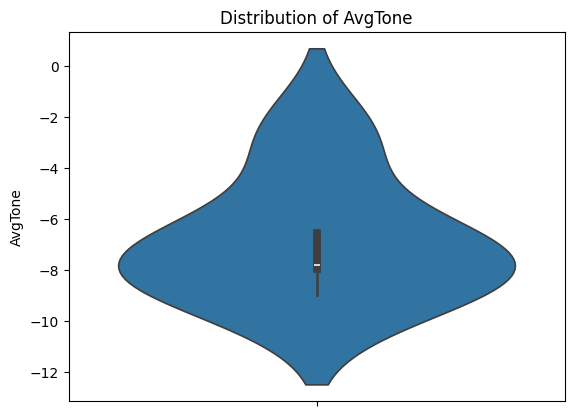

In [ ]:
sns.violinplot(y=df_merged1["AvgTone"])
plt.title("Distribution of AvgTone")
plt.show()

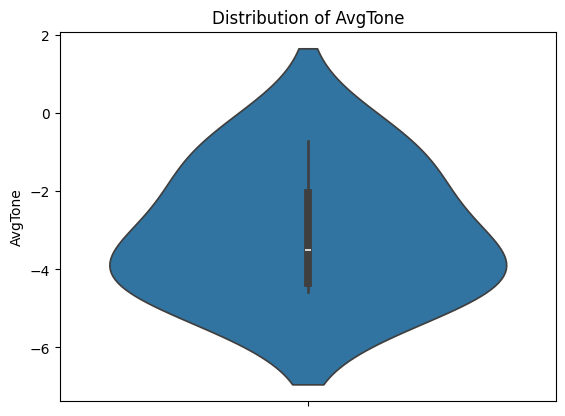

In [ ]:
sns.violinplot(y=df_merged2["AvgTone"])
plt.title("Distribution of AvgTone")
plt.show()

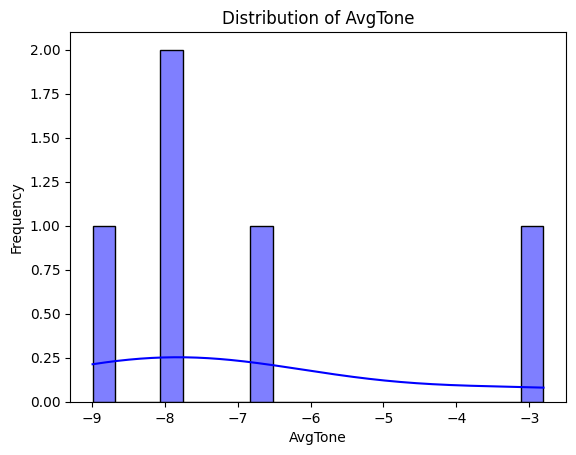

In [ ]:
sns.histplot(df_merged1["AvgTone"], bins=20, kde=True, color="blue")
plt.title("Distribution of AvgTone")
plt.xlabel("AvgTone")
plt.ylabel("Frequency")
plt.show()

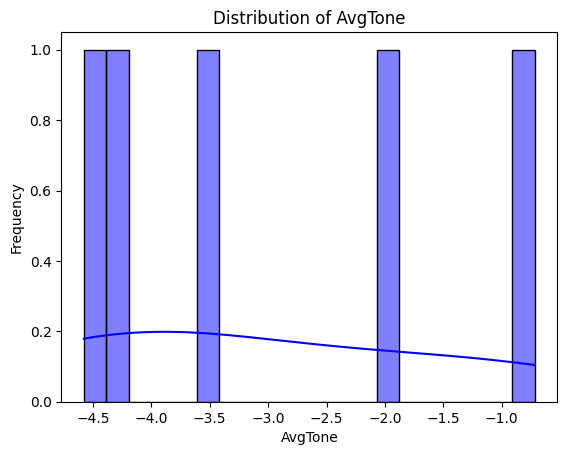

In [ ]:
sns.histplot(df_merged2["AvgTone"], bins=20, kde=True, color="blue")
plt.title("Distribution of AvgTone")
plt.xlabel("AvgTone")
plt.ylabel("Frequency")
plt.show()